# Un exemple de régression linéaire

Vous êtes appelé pour aider une entreprise forestière à estimer **la hauteur des arbres en fonction de la circonférence de leur tronc**.

In [1]:
# bibliothèques standard
import numpy as np
import matplotlib.pyplot as plt

# pour avoir des graphiques interactifs
import ipywidgets as widgets
from IPython.display import display

# 1. Génération de données

Un bûcheron a mesuré la circonférence et la hauteur de 50 arbres.

Il vous donne les données suivantes : 

| Circonférence (cm) | Hauteur (m) |
|--------------------|-------------|
| 30                 | 14          |
| 45                 | 20          |
| ...                | ...         |

Mathématiquement, vous avec un jeu de données (*dataset*) : 

$$ \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\} $$

avec $x_i$ la circonférence ou **variable explicative** et $y_i$ la hauteur de l'arbre ou **variable à expliquer** $i$.

Que l'on peut représenter graphiquement :

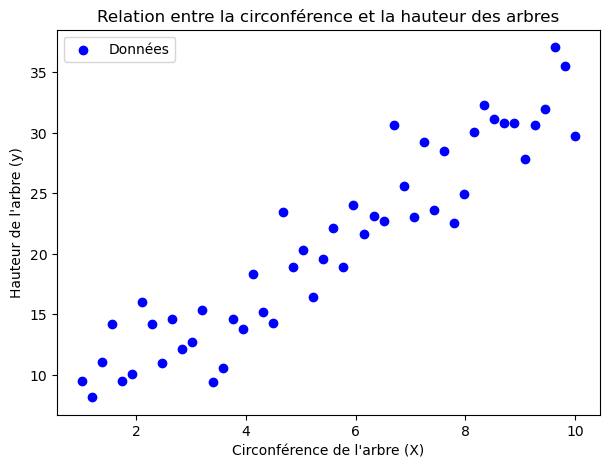

In [2]:
# pour être reproductible, on fixe la seed
np.random.seed(42)

# génération de données synthétiques
n = 50
X = np.linspace(1, 10, n).reshape(-1, 1)
true_slope, true_intercept = 3, 5

# on ajoute un bruit gaussien aux données
# ce bruit correspond à des variations aléatoires (arbres d'essences différentes,
# erreurs de mesure, etc.  )
noise = np.random.normal(0, 3, size=n)
y = true_slope * X.flatten() + true_intercept + noise

# Visualisation des données
plt.figure(figsize=(7, 5))
plt.scatter(X, y, color="blue", label="Données")
plt.xlabel("Circonférence de l'arbre (X)")
plt.ylabel("Hauteur de l'arbre (y)")
plt.title("Relation entre la circonférence et la hauteur des arbres")
plt.legend()
plt.show()

# 2. Modélisation par une droite

Le graphique précédent nous apprend plusieurs choses : 

1. Les deux variables sont **corrélées** (quand la circonférence augmente, la hauteur aussi).
2. La relation a l'air d'être **linéaire** entre les deux variables (quand la circonférence augmente, la hauteur aussi, mais toujours dans la même proportion).
   
> Vous en concluez qu'une bonne modélisation serait une régression linéaire : on a très envie de tracer une droite pour modéliser cette relation, mais laquelle ?

Une droite est définie par deux paramètres : sa pente (a) et son ordonnée à l'origine (b), dans notre cas cela donne :

$$
\text{hauteur} = \text{a} \cdot \text{circonférence} + \text{b}
$$

On a donc pour chaque arbre une prédiction notée ŷᵢ (y chapeau) que l'on souhaite être proche de la vraie hauteur yᵢ.

$$\hat{y}_i = \text{a} \cdot x_i + \text{b}$$

**Comment choisir a et b ?**

In [3]:
# Sliders
pente_slider = widgets.FloatSlider(
    value=1.0, min=-6.0, max=6.0, step=0.1, description="Pente:"
)
intercept_slider = widgets.FloatSlider(
    value=1.0, min=-10.0, max=10.0, step=0.1, description="Ordonnée:"
)

# Output pour le plot
output = widgets.Output()


# Fonction de mise à jour
def update_plot(change=None):
    with output:
        output.clear_output(wait=True)
        pente = pente_slider.value
        intercept = intercept_slider.value
        plt.figure(figsize=(7, 5))
        plt.scatter(X, y, color="blue", label="Données")
        plt.plot(X, pente * X + intercept, color="red", label="Modèle")
        plt.xlabel("Circonférence de l'arbre (X)")
        plt.ylabel("Hauteur de l'arbre (y)")
        plt.title("Régression Linéaire Interactive")
        plt.xlim(0, 11)  # axes fixes
        plt.ylim(0, 40)
        plt.legend()
        plt.show()


# Observer les sliders
pente_slider.observe(update_plot, names="value")
intercept_slider.observe(update_plot, names="value")

# Affichage
display(pente_slider, intercept_slider, output)
update_plot()  # plot initial

FloatSlider(value=1.0, description='Pente:', max=6.0, min=-6.0)

FloatSlider(value=1.0, description='Ordonnée:', max=10.0, min=-10.0)

Output()

De fait, on peut établir une correspondance entre l'espace des paramètres (ordonnée à l'origine et pente) et l'espace des droites. Vous pouvez jouer avec les paramètres pour voir comment la droite change et vous convaincre que toutes les droites possibles sont couvertes.

In [4]:
# Sliders
pente_slider = widgets.FloatSlider(
    value=1.0, min=-6.0, max=6.0, step=0.1, description="Pente:"
)
intercept_slider = widgets.FloatSlider(
    value=1.0, min=-10.0, max=10.0, step=0.1, description="Ordonnée:"
)

# Output pour la figure
output = widgets.Output()
display(pente_slider, intercept_slider, output)


# Fonction de mise à jour
def update_both_plots(change=None):
    pente = pente_slider.value
    intercept = intercept_slider.value

    with output:
        output.clear_output(wait=True)

        # Crée une nouvelle figure à chaque update (unique affichage)
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        # Espace des paramètres
        ax[0].set_title("Espace des paramètres")
        ax[0].set_xlabel("Ordonnée à l'origine")
        ax[0].set_ylabel("Pente")
        ax[0].set_xlim(-10, 10)
        ax[0].set_ylim(-6, 6)
        ax[0].grid()
        ax[0].plot(intercept, pente, "ro", label="Paramètres actuels")
        ax[0].scatter(
            [true_intercept], [true_slope], color="green", label="Vrais paramètres"
        )
        ax[0].legend()

        # Espace des droites
        ax[1].set_title("Espace des droites")
        ax[1].set_xlabel("Circonférence de l'arbre (X)")
        ax[1].set_ylabel("Hauteur de l'arbre (y)")
        ax[1].set_xlim(0, 11)
        ax[1].set_ylim(0, 40)
        ax[1].grid()
        ax[1].scatter(X, y, color="blue", label="Données")
        ax[1].plot(
            X,
            true_slope * X + true_intercept,
            color="green",
            linestyle="--",
            label="Vraie relation",
        )
        ax[1].plot(X, pente * X + intercept, color="red", label="Modèle")
        ax[1].legend()

        plt.show(fig)  # n'affiche qu'une seule figure


# Observer les sliders
pente_slider.observe(update_both_plots, names="value")
intercept_slider.observe(update_both_plots, names="value")

# Affichage initial
update_both_plots()

FloatSlider(value=1.0, description='Pente:', max=6.0, min=-6.0)

FloatSlider(value=1.0, description='Ordonnée:', max=10.0, min=-10.0)

Output()

# 3. Comment choisir la meilleure droite ?


Pour chaque point du jeu de données (xᵢ, yᵢ), on peut calculer la distance verticale entre le point et la droite. C'est l'erreur de prédiction pour ce point ou l'erreur résiduelle :
$$
\text{erreur}_i = y_i - (\text{a} \cdot x_i + \text{b})
$$

Graphiquement : 
<p align="center">
  <img src="./img/rmse.png" alt="plot" width="50%"/>
</p>

Pour évaluer la qualité globale de la droite, on cherche à minimiser cette erreur moyenne. Plusieurs stratégies sont possibles : 

- minimiser l'erreur moyenne : $$\frac{1}{n} \sum_{i=1}^{n} \text{erreur}_i$$ -> cela ne marche pas car les erreurs positives et négatives se compensent

- minimiser l'erreur absolue moyenne (Mean Absolute Error ou MAE) :
  $$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\text{erreur}_i|$$
    -> cela marche mais c'est plus compliqué à optimiser et les grosses erreurs sont moins pénalisées

- minimiser l'erreur quadratique moyenne (Mean Squared Error ou MSE) :
  $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \text{erreur}_i^2$$
  -> c'est la méthode la plus courante, car elle est facile à optimiser et les grosses erreurs sont plus pénalisées que les petites.

- pour avoir une métrique dans les mêmes unités que la variable à prédire (ici la hauteur des arbres en mètres), on utilise la racine de l'erreur quadratique moyenne (Root Mean Squared Error ou RMSE) :
  $$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \text{erreur}_i^2}$$


La RMSE mesure l'erreur quadratique moyenne, on peut aussi regarder la somme des résidus au carré, ou Residual Sum of Squares (RSS) :

$$
\text{RSS(a, b)} = \sum_{i=1}^{n} (y_i - (a \cdot x_i + b))^2
$$

De la même manière, plus la RSS est petite, plus la droite est proche des points.


Graphiquement : 
<p align="center">
  <img src="./img/rss.jpg" alt="plot" width="50%"/>
</p>

> Trouver la meilleure droite revient donc à trouver les paramètres a et b qui minimisent la RMSE ou la MSE.

On peut donc regarder dans l'espace des paramètres (a, b) la région où la RMSE est la plus faible, soit en regardant les courbes de niveau (plot 1), soit en regardant la surface 3D (plot 2).


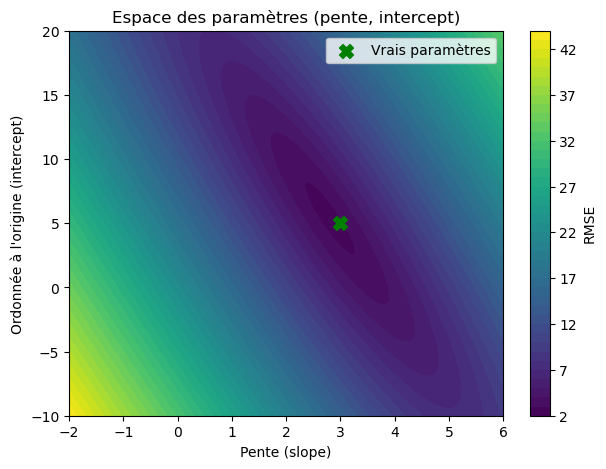

In [5]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# grille de paramètres
slope_vals = np.linspace(-2, 6, 100)
intercept_vals = np.linspace(-10, 20, 100)
# meshgrid pour avoir tous les couples (slope, intercept)
S, I = np.meshgrid(slope_vals, intercept_vals)

# Calcul vectorié du RMSE pour chaque couple (slope, intercept) ---
RMSE_vals = np.sqrt(
    np.mean(
        (
            y.reshape(1, 1, -1)
            - (S[:, :, np.newaxis] * X.flatten() + I[:, :, np.newaxis])
        )
        ** 2,
        axis=2,
    )
)

fig, ax = plt.subplots(figsize=(7, 5))
contour = ax.contourf(S, I, RMSE_vals, levels=50, cmap="viridis")
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label("RMSE")

ax.set_title("Espace des paramètres (pente, intercept)")
ax.set_xlabel("Pente (slope)")
ax.set_ylabel("Ordonnée à l'origine (intercept)")

# on ajoute le point des vrais paramètres
ax.scatter(
    true_slope,
    true_intercept,
    color="green",
    marker="X",
    s=100,
    label="Vrais paramètres",
)
ax.legend()

plt.show()

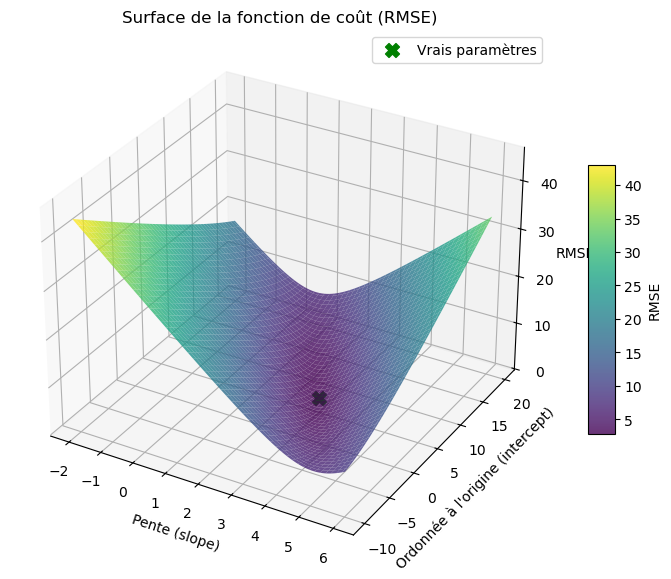

In [6]:
# --- figure 3D ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(S, I, RMSE_vals, cmap="viridis", edgecolor="none", alpha=0.8)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="RMSE")

ax.set_title("Surface de la fonction de coût (RMSE)")
ax.set_xlabel("Pente (slope)")
ax.set_ylabel("Ordonnée à l'origine (intercept)")
ax.set_zlabel("RMSE")

# point des vrais paramètres
ax.scatter(
    true_slope,
    true_intercept,
    rmse(y, true_slope * X.flatten() + true_intercept),
    color="green",
    s=100,
    marker="X",
    label="Vrais paramètres",
)
ax.legend()

plt.show()

Vous pouvez vous amuser à modifier les paramètres a et b pour voir comment la RMSE change.

In [7]:
pente_slider = widgets.FloatSlider(
    value=1.0, min=-2.0, max=6.0, step=0.1, description="Pente:"
)
intercept_slider = widgets.FloatSlider(
    value=1.0, min=-10.0, max=10.0, step=0.1, description="Ordonnée:"
)

# ----------------------------
# Output pour la figure
# ----------------------------
output = widgets.Output()
display(pente_slider, intercept_slider, output)


# ----------------------------
# Fonction de mise à jour
# ----------------------------
def update_both_plots(change=None):
    pente = pente_slider.value
    intercept = intercept_slider.value
    y_pred = pente * X.flatten() + intercept
    rmse_value = np.sqrt(np.mean((y - y_pred) ** 2))

    with output:
        output.clear_output(wait=True)

        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        # --- Espace des paramètres (contours déjà précalculés) ---
        cs = ax[0].contour(I, S, RMSE_vals, levels=20, cmap="viridis")
        ax[0].clabel(cs, inline=True, fontsize=8)
        ax[0].set_title("Espace des paramètres")
        ax[0].set_xlabel("Ordonnée à l'origine")
        ax[0].set_ylabel("Pente")
        ax[0].set_xlim(-10, 10)
        ax[0].set_ylim(-2, 6)
        ax[0].grid()
        ax[0].plot(intercept, pente, "ro", label="Paramètres actuels")
        ax[0].scatter(
            [true_intercept],
            [true_slope],
            color="green",
            marker="X",
            s=100,
            label="Vrais paramètres",
        )
        ax[0].legend()
        ax[0].text(
            0.05,
            0.95,
            f"RMSE = {rmse_value:.2f}",
            transform=ax[0].transAxes,
            fontsize=12,
            verticalalignment="top",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),
        )

        # --- Espace des droites ---
        ax[1].set_title(f"Espace des droites (RMSE = {rmse_value:.2f})")
        ax[1].set_xlabel("Circonférence de l'arbre (X)")
        ax[1].set_ylabel("Hauteur de l'arbre (y)")
        ax[1].set_xlim(0, 11)
        ax[1].set_ylim(0, 40)
        ax[1].grid()
        ax[1].scatter(X, y, color="blue", label="Données")
        ax[1].plot(
            X,
            true_slope * X + true_intercept,
            color="green",
            linestyle="--",
            label="Vraie relation",
        )
        ax[1].plot(X, y_pred, color="red", label="Modèle")
        ax[1].legend()

        plt.show(fig)


# ----------------------------
# Observer les sliders
# ----------------------------
pente_slider.observe(update_both_plots, names="value")
intercept_slider.observe(update_both_plots, names="value")

# ----------------------------
# Affichage initial
# ----------------------------
update_both_plots()

FloatSlider(value=1.0, description='Pente:', max=6.0, min=-2.0)

FloatSlider(value=1.0, description='Ordonnée:', max=10.0, min=-10.0)

Output()

En machine learning, on appelle cette fonction que l'on cherche à minimiser la **fonction de coût** ou **loss function**, elle est notée J(a, b) et mesure la qualité de la modélisation. 

On a maintenant tous les ingrédients du machine learning supervisé :

1. Une question : Comment prédire la hauteur des arbres en fonction de la circonférence de leur tronc ?
2. Un jeu de données : 50 mesures de circonférence et de hauteur d'arbres.
3. Un modèle : une droite définie par deux paramètres (a, b).
4. Une fonction de coût : la RMSE que l'on cherche à minimiser.

> La question est maintenant : **comment trouver les paramètres a et b qui minimisent la fonction de coût** ?